## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=512, activation="relu")(x)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.9430 - acc: 0.2829 - val_loss: 1.7851 - val_acc: 0.3525
Epoch 2/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.7203 - acc: 0.3803 - val_loss: 1.6405 - val_acc: 0.4132
Epoch 3/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.6365 - acc: 0.4111 - val_loss: 1.6115 - val_acc: 0.4213
Epoch 4/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.5750 - acc: 0.4311 - val_loss: 1.6861 - val_acc: 0.3961
Epoch 5/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.5247 - acc: 0.4534 - val_loss: 1.5257 - val_acc: 0.4554
Epoch 6/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.4803 - acc: 0.4695 - val_loss: 1.5045 - val_acc: 0.4674
Epoch 7/500
50000/50000 [==============================] - 3s 53us/step -

Epoch 58/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.3082 - acc: 0.8905 - val_loss: 2.8756 - val_acc: 0.5006
Epoch 59/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.2929 - acc: 0.8978 - val_loss: 2.8821 - val_acc: 0.4996
Epoch 60/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.2657 - acc: 0.9035 - val_loss: 3.1283 - val_acc: 0.4860
Epoch 61/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.2923 - acc: 0.8959 - val_loss: 2.8978 - val_acc: 0.4984
Epoch 62/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.2668 - acc: 0.9063 - val_loss: 3.0285 - val_acc: 0.4872
Epoch 63/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.2538 - acc: 0.9089 - val_loss: 3.1082 - val_acc: 0.4904
Epoch 64/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.2696 - acc: 0.9049 - val_loss: 3.1632 - val_acc: 0.4884
Epoch 65/500
50000/50000 [=

50000/50000 [==============================] - 3s 53us/step - loss: 0.1726 - acc: 0.9423 - val_loss: 3.7427 - val_acc: 0.4912
Epoch 117/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.1351 - acc: 0.9540 - val_loss: 3.8206 - val_acc: 0.5026
Epoch 118/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.1046 - acc: 0.9649 - val_loss: 3.9112 - val_acc: 0.4978
Epoch 119/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.1372 - acc: 0.9549 - val_loss: 3.9050 - val_acc: 0.4891
Epoch 120/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.1354 - acc: 0.9537 - val_loss: 3.9465 - val_acc: 0.4975
Epoch 121/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.1235 - acc: 0.9582 - val_loss: 4.1078 - val_acc: 0.4949
Epoch 122/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.1582 - acc: 0.9480 - val_loss: 3.7905 - val_acc: 0.4993
Epoch 123/500
50000/50000 [=======

50000/50000 [==============================] - 3s 54us/step - loss: 0.0641 - acc: 0.9788 - val_loss: 4.4699 - val_acc: 0.4964
Epoch 175/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.1270 - acc: 0.9581 - val_loss: 4.1302 - val_acc: 0.4948
Epoch 176/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.1028 - acc: 0.9668 - val_loss: 4.1648 - val_acc: 0.5000
Epoch 177/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.1042 - acc: 0.9662 - val_loss: 4.1669 - val_acc: 0.4864
Epoch 178/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0851 - acc: 0.9723 - val_loss: 4.2356 - val_acc: 0.4937
Epoch 179/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.1037 - acc: 0.9662 - val_loss: 4.0224 - val_acc: 0.4962
Epoch 180/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0969 - acc: 0.9676 - val_loss: 4.2448 - val_acc: 0.4960
Epoch 181/500
50000/50000 [=======

50000/50000 [==============================] - 3s 52us/step - loss: 0.0886 - acc: 0.9709 - val_loss: 4.3011 - val_acc: 0.4916
Epoch 233/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0678 - acc: 0.9782 - val_loss: 4.3151 - val_acc: 0.4932
Epoch 234/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0884 - acc: 0.9714 - val_loss: 4.2977 - val_acc: 0.4920
Epoch 235/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0803 - acc: 0.9747 - val_loss: 4.2640 - val_acc: 0.4979
Epoch 236/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0773 - acc: 0.9762 - val_loss: 4.2104 - val_acc: 0.4977
Epoch 237/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0700 - acc: 0.9784 - val_loss: 4.3294 - val_acc: 0.4971
Epoch 238/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0815 - acc: 0.9735 - val_loss: 4.4238 - val_acc: 0.4881
Epoch 239/500
50000/50000 [=======

50000/50000 [==============================] - 3s 51us/step - loss: 0.0605 - acc: 0.9808 - val_loss: 4.4995 - val_acc: 0.4932
Epoch 291/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0779 - acc: 0.9760 - val_loss: 4.2216 - val_acc: 0.4909
Epoch 292/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0586 - acc: 0.9816 - val_loss: 4.5537 - val_acc: 0.4825
Epoch 293/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0640 - acc: 0.9794 - val_loss: 4.4714 - val_acc: 0.4923
Epoch 294/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0844 - acc: 0.9737 - val_loss: 4.4481 - val_acc: 0.4867
Epoch 295/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0690 - acc: 0.9776 - val_loss: 4.4985 - val_acc: 0.4905
Epoch 296/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0602 - acc: 0.9813 - val_loss: 4.5037 - val_acc: 0.4913
Epoch 297/500
50000/50000 [=======

50000/50000 [==============================] - 3s 51us/step - loss: 0.0514 - acc: 0.9842 - val_loss: 4.7014 - val_acc: 0.4895
Epoch 349/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0777 - acc: 0.9761 - val_loss: 4.3738 - val_acc: 0.4907
Epoch 350/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0584 - acc: 0.9809 - val_loss: 4.3995 - val_acc: 0.4931
Epoch 351/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0603 - acc: 0.9820 - val_loss: 4.5192 - val_acc: 0.4959
Epoch 352/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0638 - acc: 0.9808 - val_loss: 4.6896 - val_acc: 0.4777
Epoch 353/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0835 - acc: 0.9743 - val_loss: 4.4434 - val_acc: 0.4905
Epoch 354/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0387 - acc: 0.9886 - val_loss: 4.6887 - val_acc: 0.4937
Epoch 355/500
50000/50000 [=======

50000/50000 [==============================] - 3s 52us/step - loss: 0.0685 - acc: 0.9789 - val_loss: 4.5640 - val_acc: 0.4927
Epoch 407/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0505 - acc: 0.9848 - val_loss: 4.5162 - val_acc: 0.4971
Epoch 408/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0489 - acc: 0.9849 - val_loss: 4.5931 - val_acc: 0.4919
Epoch 409/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0666 - acc: 0.9797 - val_loss: 4.4815 - val_acc: 0.4993
Epoch 410/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0512 - acc: 0.9846 - val_loss: 4.5225 - val_acc: 0.4998
Epoch 411/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0529 - acc: 0.9842 - val_loss: 4.5468 - val_acc: 0.5004
Epoch 412/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0415 - acc: 0.9880 - val_loss: 4.6559 - val_acc: 0.4846
Epoch 413/500
50000/50000 [=======

50000/50000 [==============================] - 3s 53us/step - loss: 0.0544 - acc: 0.9839 - val_loss: 4.5797 - val_acc: 0.4943
Epoch 465/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0451 - acc: 0.9863 - val_loss: 4.7171 - val_acc: 0.4929
Epoch 466/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0618 - acc: 0.9826 - val_loss: 4.4489 - val_acc: 0.4923
Epoch 467/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0518 - acc: 0.9846 - val_loss: 4.4989 - val_acc: 0.4968
Epoch 468/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0380 - acc: 0.9884 - val_loss: 4.7131 - val_acc: 0.4976
Epoch 469/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0536 - acc: 0.9851 - val_loss: 4.4521 - val_acc: 0.4993
Epoch 470/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0687 - acc: 0.9796 - val_loss: 4.3803 - val_acc: 0.4916
Epoch 471/500
50000/50000 [=======

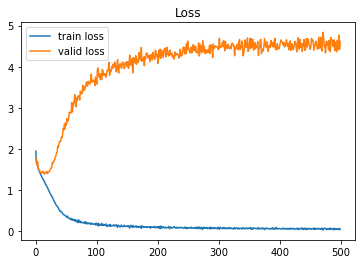

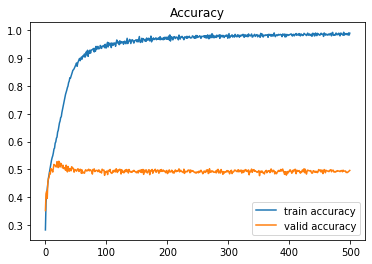

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [12]:
model = build_mlp()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 55us/step - loss: 2.2989 - acc: 0.1146 - val_loss: 2.2901 - val_acc: 0.1305
Epoch 2/500
50000/50000 [==============================] - 2s 46us/step - loss: 2.2838 - acc: 0.1367 - val_loss: 2.2765 - val_acc: 0.1528
Epoch 3/500
50000/50000 [==============================] - 2s 45us/step - loss: 2.2687 - acc: 0.1596 - val_loss: 2.2602 - val_acc: 0.1685
Epoch 4/500
50000/50000 [==============================] - 2s 45us/step - loss: 2.2514 - acc: 0.1725 - val_loss: 2.2414 - val_acc: 0.1809
Epoch 5/500
50000/50000 [==============================] - 2s 45us/step - loss: 2.2314 - acc: 0.1851 - val_loss: 2.2196 - val_acc: 0.1885
Epoch 6/500
50000/50000 [==============================] - 2s 45us/step - loss: 2.2079 - acc: 0.1927 - val_loss: 2.1933 - val_acc: 0.2009
Epoch 7/500
50000/50000 [==============================] - 2s 45us/step - loss: 2.1791 - acc: 0.2052 - val_loss: 2.1626 - 

50000/50000 [==============================] - 2s 45us/step - loss: 1.6762 - acc: 0.4043 - val_loss: 1.7048 - val_acc: 0.3863
Epoch 60/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.6720 - acc: 0.4059 - val_loss: 1.6720 - val_acc: 0.3993
Epoch 61/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.6684 - acc: 0.4070 - val_loss: 1.6819 - val_acc: 0.3994
Epoch 62/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.6638 - acc: 0.4094 - val_loss: 1.6612 - val_acc: 0.4079
Epoch 63/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.6601 - acc: 0.4108 - val_loss: 1.6586 - val_acc: 0.4098
Epoch 64/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.6554 - acc: 0.4111 - val_loss: 1.6615 - val_acc: 0.4098
Epoch 65/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6526 - acc: 0.4128 - val_loss: 1.6770 - val_acc: 0.4016
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.4845 - acc: 0.4723 - val_loss: 1.5407 - val_acc: 0.4455
Epoch 119/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.4809 - acc: 0.4716 - val_loss: 1.5016 - val_acc: 0.4611
Epoch 120/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.4770 - acc: 0.4739 - val_loss: 1.5082 - val_acc: 0.4573
Epoch 121/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4760 - acc: 0.4758 - val_loss: 1.5096 - val_acc: 0.4588
Epoch 122/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.4744 - acc: 0.4750 - val_loss: 1.5218 - val_acc: 0.4564
Epoch 123/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.4706 - acc: 0.4763 - val_loss: 1.5586 - val_acc: 0.4440
Epoch 124/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4674 - acc: 0.4782 - val_loss: 1.4934 - val_acc: 0.4634
Epoch 125/500
50000

50000/50000 [==============================] - 2s 45us/step - loss: 1.3525 - acc: 0.5187 - val_loss: 1.4294 - val_acc: 0.4839
Epoch 177/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.3496 - acc: 0.5190 - val_loss: 1.4230 - val_acc: 0.4867
Epoch 178/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.3507 - acc: 0.5184 - val_loss: 1.4766 - val_acc: 0.4688
Epoch 179/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.3484 - acc: 0.5196 - val_loss: 1.5527 - val_acc: 0.4516
Epoch 180/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.3480 - acc: 0.5182 - val_loss: 1.4301 - val_acc: 0.4840
Epoch 181/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.3474 - acc: 0.5208 - val_loss: 1.5689 - val_acc: 0.4478
Epoch 182/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3410 - acc: 0.5207 - val_loss: 1.4597 - val_acc: 0.4736
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 45us/step - loss: 1.2406 - acc: 0.5568 - val_loss: 1.3734 - val_acc: 0.5118
Epoch 235/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.2388 - acc: 0.5574 - val_loss: 1.4195 - val_acc: 0.4932
Epoch 236/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.2392 - acc: 0.5574 - val_loss: 1.4162 - val_acc: 0.4943
Epoch 237/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.2339 - acc: 0.5592 - val_loss: 1.4063 - val_acc: 0.5010
Epoch 238/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2360 - acc: 0.5566 - val_loss: 1.3815 - val_acc: 0.5062
Epoch 239/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.2366 - acc: 0.5599 - val_loss: 1.3995 - val_acc: 0.4995
Epoch 240/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.2371 - acc: 0.5609 - val_loss: 1.3698 - val_acc: 0.5100
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 2s 45us/step - loss: 1.1488 - acc: 0.5909 - val_loss: 1.4476 - val_acc: 0.4985
Epoch 293/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.1489 - acc: 0.5901 - val_loss: 1.3809 - val_acc: 0.5160
Epoch 294/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.1408 - acc: 0.5926 - val_loss: 1.4215 - val_acc: 0.5000
Epoch 295/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1379 - acc: 0.5959 - val_loss: 1.3734 - val_acc: 0.5153
Epoch 296/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.1366 - acc: 0.5927 - val_loss: 1.4142 - val_acc: 0.5066
Epoch 297/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.1355 - acc: 0.5951 - val_loss: 1.3964 - val_acc: 0.5053
Epoch 298/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.1308 - acc: 0.5957 - val_loss: 1.4193 - val_acc: 0.5004
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 2s 45us/step - loss: 1.0483 - acc: 0.6251 - val_loss: 1.3733 - val_acc: 0.5245
Epoch 351/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0449 - acc: 0.6269 - val_loss: 1.3745 - val_acc: 0.5218
Epoch 352/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0508 - acc: 0.6254 - val_loss: 1.3531 - val_acc: 0.5321
Epoch 353/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0554 - acc: 0.6247 - val_loss: 1.3494 - val_acc: 0.5333
Epoch 354/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0440 - acc: 0.6274 - val_loss: 1.3702 - val_acc: 0.5275
Epoch 355/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0382 - acc: 0.6310 - val_loss: 1.5966 - val_acc: 0.4778
Epoch 356/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0448 - acc: 0.6271 - val_loss: 1.4152 - val_acc: 0.5093
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 0.9576 - acc: 0.6566 - val_loss: 1.4085 - val_acc: 0.5218
Epoch 409/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9548 - acc: 0.6587 - val_loss: 1.5806 - val_acc: 0.4806
Epoch 410/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9446 - acc: 0.6624 - val_loss: 1.4205 - val_acc: 0.5229
Epoch 411/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9448 - acc: 0.6619 - val_loss: 1.3995 - val_acc: 0.5281
Epoch 412/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9494 - acc: 0.6598 - val_loss: 1.4121 - val_acc: 0.5239
Epoch 413/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9472 - acc: 0.6629 - val_loss: 1.4031 - val_acc: 0.5223
Epoch 414/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9472 - acc: 0.6621 - val_loss: 1.5404 - val_acc: 0.4885
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 2s 45us/step - loss: 0.8512 - acc: 0.6953 - val_loss: 1.3839 - val_acc: 0.5374
Epoch 467/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.8616 - acc: 0.6911 - val_loss: 1.5042 - val_acc: 0.5102
Epoch 468/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.8620 - acc: 0.6922 - val_loss: 1.5801 - val_acc: 0.4973
Epoch 469/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.8622 - acc: 0.6912 - val_loss: 1.5492 - val_acc: 0.5072
Epoch 470/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.8487 - acc: 0.6968 - val_loss: 1.5446 - val_acc: 0.4994
Epoch 471/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.8480 - acc: 0.6968 - val_loss: 1.3977 - val_acc: 0.5341
Epoch 472/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.8397 - acc: 0.7006 - val_loss: 1.5277 - val_acc: 0.5001
Epoch 473/500
50000/50000 [=======

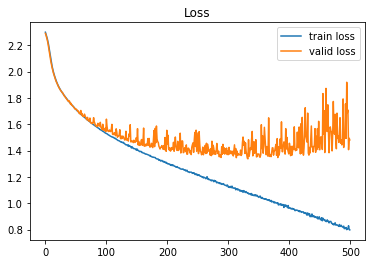

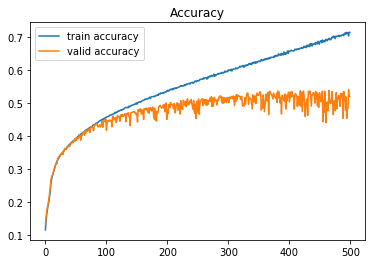

In [13]:
%matplotlib inline
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()